In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
#parametres (steel)
L = 1.0                 
N = 100                 
dx = L / (N - 1)        
dt = 1e-7               
T = 1e-5                
mu = 100.0              
rho = 7850.0              
G = 7.9e10
num_steps = int(T/dt)
x = np.linspace(-L/2, L/2, N)

In [51]:
# Initial conditions
v = np.zeros(N)         
sigma = np.exp(-mu * x**2)  
tau = np.zeros(N)

In [52]:
# Arrays for updated values
v_new = np.zeros(N)
sigma_new = np.zeros(N)
tau_new = np.zeros(N)

In [53]:
# Time evolution loop
for n in range(num_steps):
    for i in range(1, N-1):
        sigma_new[i] = sigma[i] + dt * rho * (v[i+1] - v[i]) / dx
    
    for i in range(1, N-1):
        v_new[i] = v[i] + dt / rho * ((sigma[i+1] + tau[i+1]) - (sigma[i] + tau[i])) / dx
    
    for i in range(1, N-1):
        tau_new[i] = tau[i] + dt * (4/3) * G * (v[i+1] - v[i]) / dx
    
    # boundary conditions (zero derivative)
    sigma_new[0], sigma_new[-1] = sigma_new[1], sigma_new[-2]
    v_new[0], v_new[-1] = v_new[1], v_new[-2]
    tau_new[0], tau_new[-1] = tau_new[1], tau_new[-2]
    
    # Update old values
    sigma = sigma_new
    v = v_new
    tau = tau_new

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Василий\AppData\Local\Temp\ipykernel_13568\1365900388.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, sigma, label="Stress ($\sigma$)")


Text(0.5, 1.0, 'Results at Final Time Step')

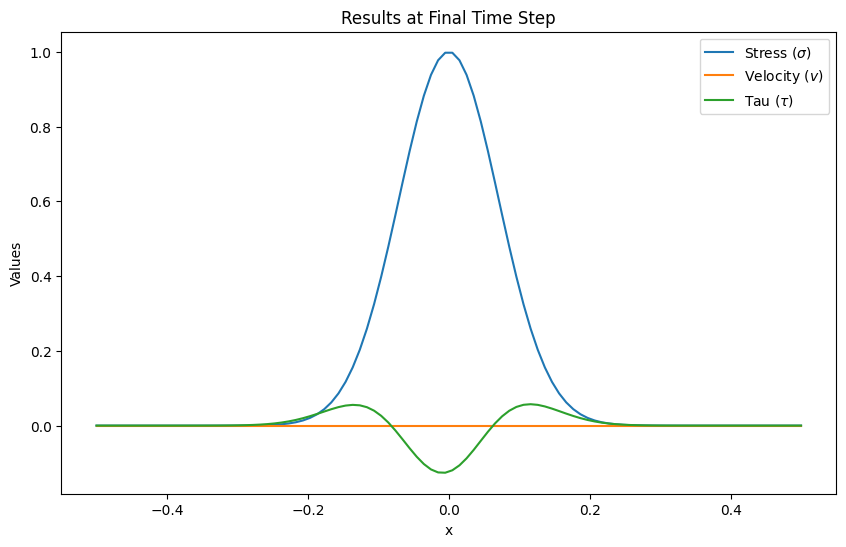

In [54]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, sigma, label="Stress ($\sigma$)")
plt.plot(x, v, label="Velocity ($v$)")
plt.plot(x, tau, label="Tau ($\\tau$)")
plt.xlabel("x")
plt.ylabel("Values")
plt.legend()
plt.title("Results at Final Time Step")